In [155]:
import numpy as np
import pandas as pd

from model.SIR import SIRModel
from model.SEIR import SEIRModel
from model.SEIRD import SEIRDModel

from plot import plotsir, plotseird

import warnings
warnings.filterwarnings(action='once')

# EXPLORATION des données

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import csv

#Recupérartion des données
url = 'https://www.data.gouv.fr/fr/resources.csv?badge=covid-19'
DOWNLOAD_PATH ='ressources.csv'
fichier = open( DOWNLOAD_PATH , "a")
urllib.request.urlretrieve(url,DOWNLOAD_PATH)
fichier.close()

ressource = pd.read_csv('ressources.csv',sep=';')
for i in ressource['url']:
    url = i
    DOWNLOAD_PATH ='./data/' + i.split("/")[-1]
    fichier = open( DOWNLOAD_PATH , "a")
    urllib.request.urlretrieve(url,DOWNLOAD_PATH)
    fichier.close()

In [157]:
#affichage
for i in ressource['url']:
    j = i.split("/")[-1]
    if(j.split(".")[-1]=='csv'):
        path = './data/' + i.split("/")[-1]
        print(path)

./data/pages-consignes-prefectorales-covid19-2.csv
./data/pages-consignes-prefectorales-covid19.csv
./data/donnees-hospitalieres-covid19-2020-06-18-19h00.csv
./data/donnees-hospitalieres-nouveaux-covid19-2020-06-18-19h00.csv
./data/donnees-hospitalieres-classe-age-covid19-2020-06-18-19h00.csv
./data/donnees-hospitalieres-etablissements-covid19-2020-06-18-19h00.csv
./data/metadonnees-donnees-hospitalieres-covid19.csv
./data/metadonnees-hospit-incid.csv
./data/metadonnees-donnees-hospitalieres-covid19-classes-age.csv
./data/metadonnees-services-hospitaliers-covid19.csv
./data/metadonnees-sexe.csv
./data/donnees-tests-covid19-labo-quotidien-2020-05-29-19h00.csv
./data/donnees-tests-covid19-labo-hebdomadaire-2020-05-27-19h00.csv
./data/metadonnees-tests-depistage-covid19.csv
./data/code-tranches-dage.csv
./data/fonds-solidarite-volet-1-regional-naf-latest.csv
./data/fonds-solidarite-volet-1-departemental-naf-latest.csv
./data/fonds-solidarite-volet-1-departemental-categorie-juridique-lates

In [158]:
dataPath = './data/donnees-hospitalieres-nouveaux-covid19-2020-06-18-19h00.csv'
data = pd.read_csv(dataPath, sep=";")

meta = './data/metadonnees-donnees-hospitalieres-covid19.csv'
metaData= pd.read_csv(meta, sep=";")
print(metaData)


  Colonne          Type                                      Description_FR  \
0     dep        integer                                        Département   
1    sexe        integer                                              Sexe    
2    jour  string($date)                              Date de notification    
3    hosp        integer     Nombre de personnes actuellement hospitalisées   
4     rea        integer  Nombre de personnes actuellement en réanimatio...   
5     rad        integer   Nombre cumulé de personnes retournées à domicile   
6      dc        integer    Nombre cumulé de personnes décédées à l'hôpital   

                                      Description_EN     Exemple  
0                                         Department           1  
1                                               Sex            0  
2                                     Date of notice  18/03/2020  
3            Number of people currently hospitalized           2  
4  Number of people currently in

In [159]:
data.head()

,dep,jour,incid_hosp,incid_rea,incid_dc,incid_rad
0,01,2020-03-19,1,0,0,0
1,01,2020-03-20,0,0,0,1
2,01,2020-03-21,4,0,0,0
3,01,2020-03-22,3,1,0,1
4,01,2020-03-23,14,1,0,5


In [160]:
data.describe

<bound method NDFrame.describe of       dep        jour  incid_hosp  incid_rea  incid_dc  incid_rad
0      01  2020-03-19           1          0         0          0
1      01  2020-03-20           0          0         0          1
2      01  2020-03-21           4          0         0          0
3      01  2020-03-22           3          1         0          1
4      01  2020-03-23          14          1         0          5
5      01  2020-03-24          11          1         0          4
6      01  2020-03-25          13          2         0          5
7      01  2020-03-26          14          3         2          2
8      01  2020-03-27          14          2         0          0
9      01  2020-03-28           7          3         1          3
10     01  2020-03-29          10          2         3          3
11     01  2020-03-30          20          7         4          1
12     01  2020-03-31          20          0         1         10
13     01  2020-04-01          38         

In [161]:
data=data.rename(columns={'incid_hosp':'hosp','incid_rea':'rea','incid_dc':'dc','incid_rad':'rad'})

In [162]:
data["confirmes"] = data["hosp"] + data["rea"] +data['rad']+data['dc']

In [163]:
dataEvol = data.groupby(['jour']).sum()


Index(['2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
       '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
       '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
       '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
       '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
       '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
       '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
       '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
       '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',

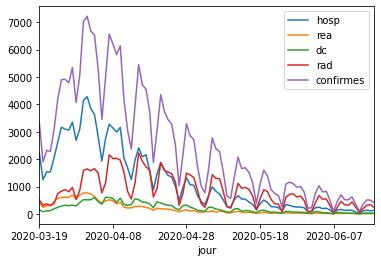

In [164]:
import matplotlib.pyplot as plt

jours =  dataEvol.index
print(jours)
dataEvol.plot()

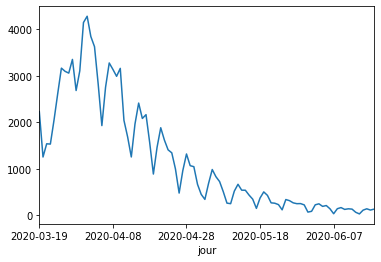

In [165]:
dataEvol['hosp'].plot()

In [166]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [167]:
N = 1000
beta = 1.0  # infected person infects 1 other person per day
D = 4.0 # infections lasts four days
gamma = 1.0 / D

S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible

In [168]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 49, 50) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [169]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
 
  plt.show();




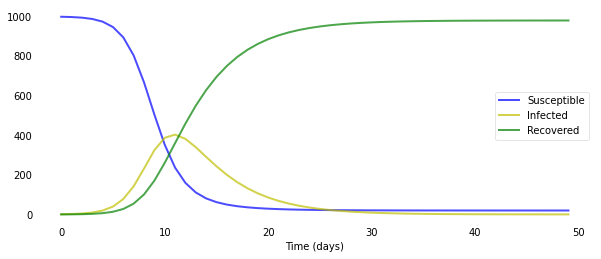

In [170]:
plotsir(t, S, I, R)



In [171]:
import scipy
f = lambda x, param : param*x**2 # la fonction
param_x = 0 # le paramètre à trouver
xrange = list(range(10)) # le nombre de valeurs tests
mesdonnees = [f(i, 2) for i in xrange] # les valeurs tests


In [172]:
params, covariance = scipy.optimize.curve_fit(f, xrange, mesdonnees) # fit
print(f"paramètres = {params}, covariances = {covariance}")

paramètres = [2.], covariances = [[0.]]


In [173]:
S0, I0, R0 = 67000000, dataEvol["confirmes"][0], 700
#print(dataEvol["confirmes"])
y0 = S0, I0, R0
f = lambda t, beta, gamma : (odeint(deriv, y0, t, args=(N, beta, gamma)).T)[1] # [1] = only Infected
params, covariance = scipy.optimize.curve_fit(f, range(dataEvol.shape[0]), dataEvol["confirmes"]) # fit
print(f"paramètres = {params}, covariances = {covariance}")

paramètres = [-0.66481822  1.76144322], covariances = [[inf inf]
 [inf inf]]


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



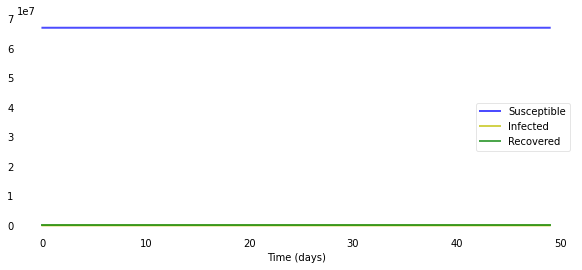

In [174]:
ret = odeint(deriv, y0, t, args=(N, params[0], params[1]))
S, I, R = ret.T
plotsir(t, S, I, R)

# SEIR

# Infected

# Sur données synthétiques

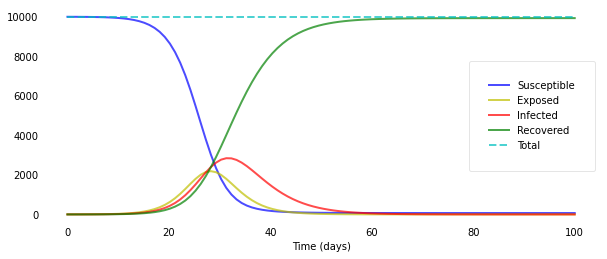

In [175]:
# variable
t = np.linspace(0, 100, 100)
N = 10000
beta = 1.0  
D = 5.0 
gamma = 1.0 / D
delta = 1.0 / 3.0  

# Generate data
seir= SEIRModel(beta=beta, gamma=gamma, delta=delta)
S, E, I, R = seir.predict(t, N, 1)
plotseird(t, S, E, I, R )



/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



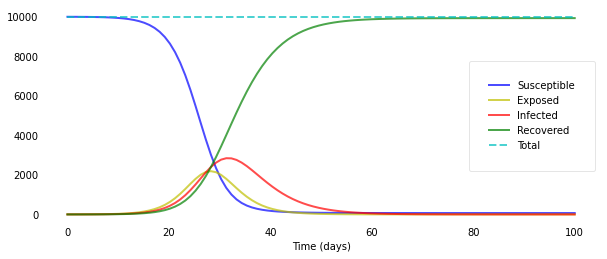

Beta : 1.0000000000000078 , predict : 1.0000000000000078
Gamma : 0.20000000000000054 , predict : 0.20000000000000054
Delta : 0.33333333333332876 , predict : 0.33333333333332876


In [176]:

seir = SEIRModel()
seir.fit(N, I)
S, E, I, R= seir.predict(t, N, 1)
plotseird(t, S, E, I, R)

print("Beta :", seir.params["beta"], ", predict :", seir.params["beta"])
print("Gamma :", seir.params["gamma"], ", predict :", seir.params["gamma"])
print("Delta :", seir.params["delta"], ", predict :", seir.params["delta"])

# Sur données réelles 

In [177]:
infected = data["hosp"] + data["rea"]+ data["rad"]
infected = list(infected)


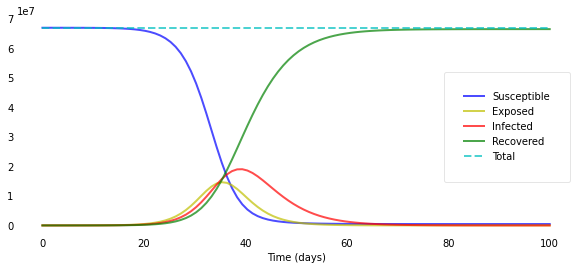

In [178]:
# variable
t = np.linspace(0, 100, 100)
N = 67_000_000
beta = 1.0  
D = 5.0 
gamma = 1.0 / D
delta = 1.0 / 3.0  

# Generate data
seir= SEIRModel(beta=beta, gamma=gamma, delta=delta)
S, E, I, R = seir.predict(t, N,I_0=infected[0],E_0= 2000)
plotseird(t, S, E, I, R )



/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



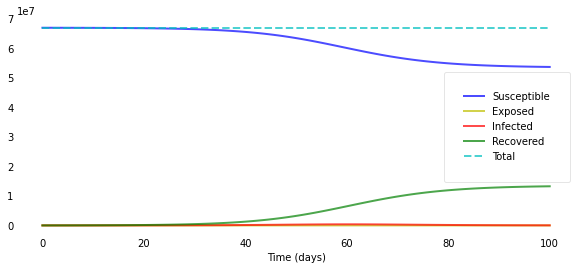

Beta : 1.0600875706968829 , predict : 1.0600875706968829
Gamma : 0.9495282282733456 , predict : 0.9495282282733456
Delta : 1042.4068670335469 , predict : 1042.4068670335469


In [179]:

seir = SEIRModel()
seir.fit(N, I)
S, E, I, R= seir.predict(t, N,I_0=infected[0],E_0= 2000)
plotseird(t, S, E, I, R)

print("Beta :", seir.params["beta"], ", predict :", seir.params["beta"])
print("Gamma :", seir.params["gamma"], ", predict :", seir.params["gamma"])
print("Delta :", seir.params["delta"], ", predict :", seir.params["delta"])

# SEIRD

# Sur données Synthétiques 

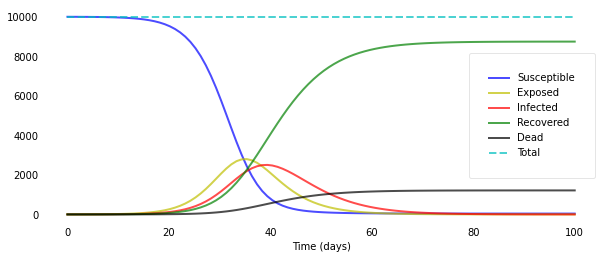

In [185]:
# variable
t = np.linspace(0, 100, 100)
N =10000
D = 5
gamma = 1 / D
R_0 = 5
all_params = {"gamma": gamma, "delta": 1 / 5, "beta": R_0 * gamma, "alpha": 0.2, "rho": 1/9}

# Generate Data
seird= SEIRDModel(**all_params)
S, E, I, R, D = seird.predict(t, N, 1)
plotseird(t, S, E, I, R, D )




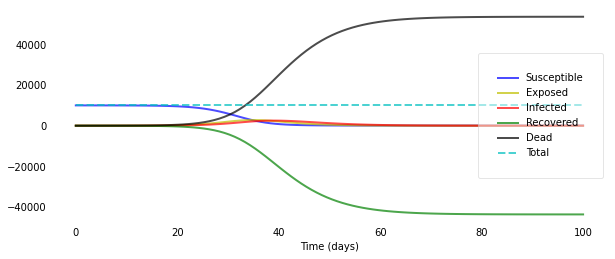

Beta : 0.9999999645506518 , predict : 0.9999999645506518
Gamma : 1.0779633603657426 , predict : 1.0779633603657426
Delta : 0.20000001180880078 , predict : 0.20000001180880078
alpha : 1.7416943649963745 , predict : 1.7416943649963745
rho : 0.5636704070199038 , predict : 0.5636704070199038


In [186]:

seird = SEIRDModel()
seird.fit(I, N)

S, E, I, R, D= seird.predict(t, N, 1)
plotseird(t, S, E, I, R, D)

print("Beta :", seird.params["beta"], ", predict :", seird.params["beta"])
print("Gamma :", seird.params["gamma"], ", predict :", seird.params["gamma"])
print("Delta :", seird.params["delta"], ", predict :", seird.params["delta"])
print("alpha :", seird.params["alpha"], ", predict :", seird.params["alpha"])
print("rho :", seird.params["rho"], ", predict :", seird.params["rho"])


# Sur nos données

In [187]:

infected = data["hosp"] + data["rea"]+data["rad"]
infected = list(infected)


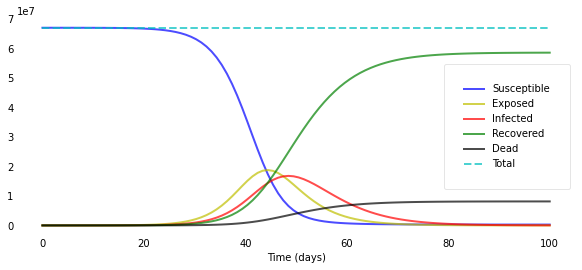

In [188]:
# variable
t = np.linspace(0, 100, 100)
N = 67_000_000
D = 5
gamma = 1 / D
R_0 = 5
all_params = {"gamma": gamma, "delta": 1 / 5, "beta": R_0 * gamma, "alpha": 0.2, "rho": 1/9}

# Generate Data
seird= SEIRDModel(**all_params)
S, E,I, R, D = seird.predict(t, N, I_0=infected[0],E_0=2000)
plotseird(t, S, E, I, R, D )


/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



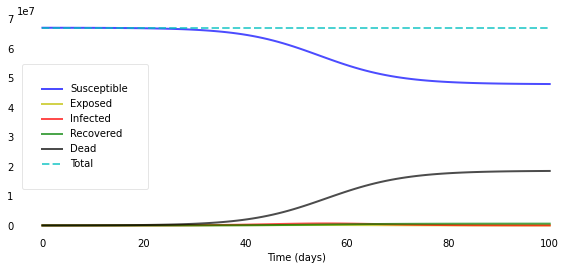

Beta : 1.0850831279315036 , predict : 1.0850831279315036
Gamma : 1.000279085949006 , predict : 1.000279085949006
Delta : 4.705685386043343 , predict : 4.705685386043343
alpha : 0.9707664847748763 , predict : 0.9707664847748763
rho : 0.919125828806892 , predict : 0.919125828806892


In [189]:

seird = SEIRDModel()
seird.fit(I, N)

S, E, I, R, D= seird.predict(t, N,I_0=infected[0],E_0= 2000)
plotseird(t, S, E, I, R, D)

print("Beta :", seird.params["beta"], ", predict :", seird.params["beta"])
print("Gamma :", seird.params["gamma"], ", predict :", seird.params["gamma"])
print("Delta :", seird.params["delta"], ", predict :", seird.params["delta"])
print("alpha :", seird.params["alpha"], ", predict :", seird.params["alpha"])
print("rho :", seird.params["rho"], ", predict :", seird.params["rho"])


In [194]:
def deriv(y, t, N, beta, gamma, delta, alpha_opt, rho):
    S, E, I, R, D = y
    def alpha(t):
        return s * I/N + alpha_opt

    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha(t)) * gamma * I - alpha(t) * rho * I
    dRdt = (1 - alpha(t)) * gamma * I
    dDdt = alpha(t) * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt


In [195]:

N = 67000000
D = 100.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.5

In [196]:


def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma

alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
s = 0.01
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))

rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed


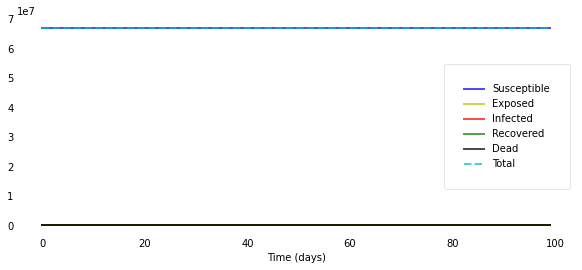

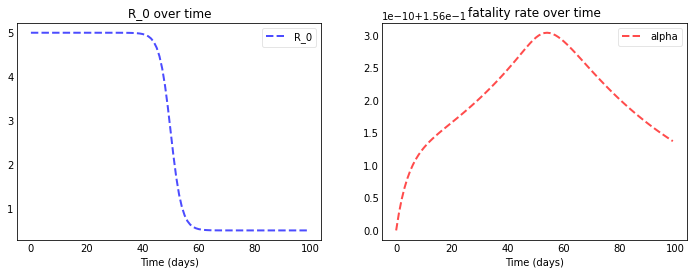

In [197]:

t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha_opt, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time

plotseird(t, S, E, I, R, D, R0=R0_over_time, Alpha=Alpha_over_time)


In [190]:

def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt


In [191]:
N = 10000
D = 100.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.5


In [192]:
def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma

alpha = 0.2  # 20% death rate
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed


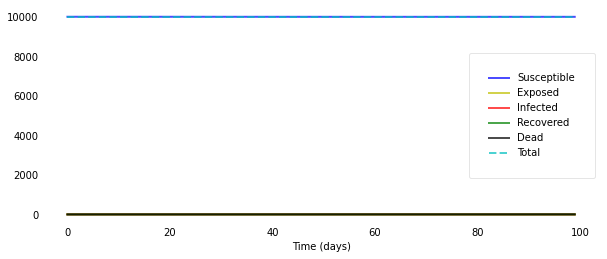

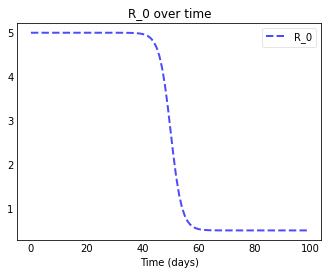

In [193]:
from scipy.integrate import odeint
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values

plotseird(t, S, E, I, R, D, R0=R0_over_time)

# Données  synthétiques

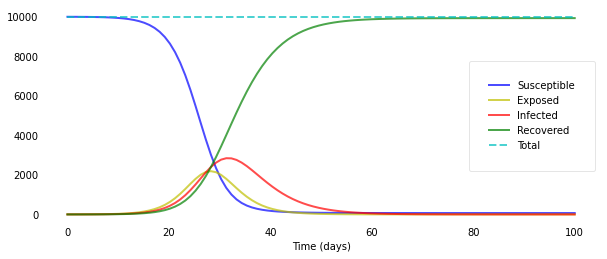

In [180]:
# variable
t = np.linspace(0, 100, 100)
N = 10000
beta = 1.0  
D = 5.0 
gamma = 1.0 / D
delta = 1.0 / 3.0  

seir_model = SEIRModel(beta=beta, gamma=gamma, delta=delta)
S, E, I, R = seir_model.predict(t, N, 1)
plotseird(t, S, E, I, R )



/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.



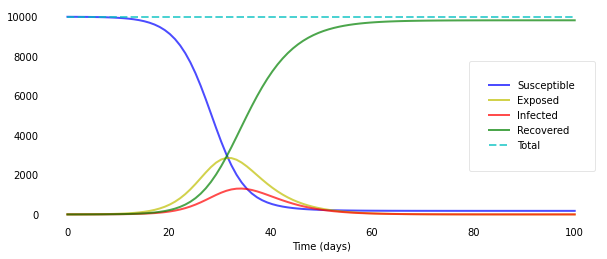

Beta : 1.6419465512659854 , predict : 1.6419465512659854
Gamma : 0.40125275339924354 , predict : 0.40125275339924354
Delta : 0.1968024219323535 , predict : 0.1968024219323535


In [181]:

seir= SEIRModel()
seir.fit(N, I, R)
S, E, I, R= seir.predict(t, N, 1)
plotseird(t, S, E, I, R)

print("Beta :", seir.params["beta"], ", predict :", seir.params["beta"])
print("Gamma :", seir.params["gamma"], ", predict :", seir.params["gamma"])
print("Delta :", seir.params["delta"], ", predict :", seir.params["delta"])

## Infected and Dead

# Données réelles

In [182]:
infected = data["hosp"] + data["rea"]+data["rad"]
infected = list(infected)


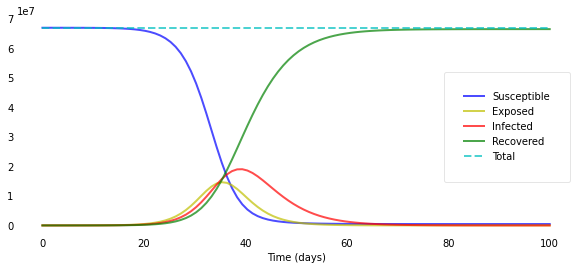

In [183]:
# variable
t = np.linspace(0, 100, 100)
N = 67_000_000
beta = 1.0  
D =5.0
gamma = 1.0 / D
delta = 1.0 / 3.0  

seir_model = SEIRModel(beta=beta, gamma=gamma, delta=delta)
S, E, I, R = seir_model.predict(t, N,I_0=infected[0],E_0= 2000)
plotseird(t, S, E, I, R )



/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

/home_local/isduser/Documents/covid/model/SEIR.py:67: RuntimeWarning:

overflow encountered in double_scalars



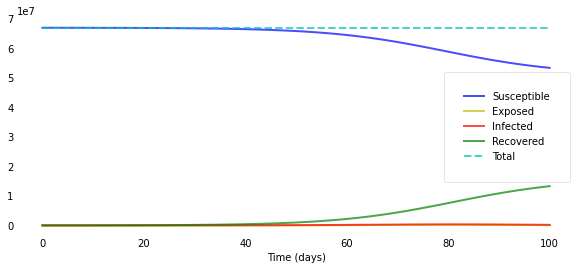

Beta : 1.0635217267307868 , predict : 1.0635217267307868
Gamma : 0.9312343042988466 , predict : 0.9312343042988466
Delta : 1.9673389180639227 , predict : 1.9673389180639227


In [184]:

seir= SEIRModel()
seir.fit(N, I, R)
S, E, I, R= seir.predict(t, N,I_0=infected[0],E_0= 2000)
plotseird(t, S, E, I, R)

print("Beta :", seir.params["beta"], ", predict :", seir.params["beta"])
print("Gamma :", seir.params["gamma"], ", predict :", seir.params["gamma"])
print("Delta :", seir.params["delta"], ", predict :", seir.params["delta"])